# Task
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их 
стационарными.

In [169]:
import pandas as pd
import numpy as np

In [170]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

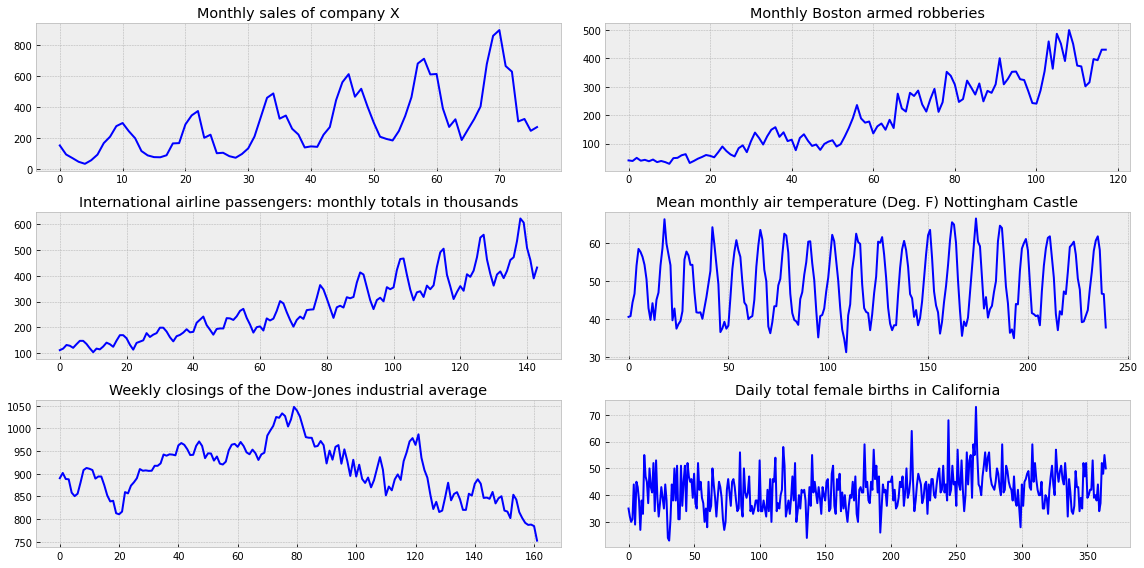

In [173]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Визуально, на стационарные ряды похожи только графики в последней строке, остальные содержат в той или иной степени элементы сезонности, тренда или изменение дисперсии

In [174]:
from statsmodels.tsa.stattools import adfuller

In [175]:
def test_stationarity(timeseries):
    """Test Dickey-Fuller"""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    return float(dfoutput['p-value'])

Проведем на каждом ряде тест Дики-Фуллера и посмотрим его результат. Уровень значимости определим в 1%

In [176]:
for cnt, (k, v) in enumerate(all_series.items()):
    print(f'---- Time Series №{cnt+1}----')
    if test_stationarity(all_series[k]) < 0.01:
        print(f'Ряд \'{k}\' стационарный')
    else:
        print(f'Ряд \'{k}\' нестационарный')
    

---- Time Series №1----
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд 'Monthly sales of company X' нестационарный
---- Time Series №2----
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Ряд 'Monthly Boston armed robberies' нестационарный
---- Time Series №3----
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.00000

Стационарным оказался только график Daily total female births in California. Уберем его из дальнейшего рассмотрения

In [177]:
all_series_stationary = {
    "Daily total female births in California": all_series['Daily total female births in California']
}

del all_series['Daily total female births in California']

# Изменение дисперсии

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [178]:
from scipy.stats import boxcox

In [179]:
for cnt, (k, v) in enumerate(all_series.items()):
    print(f'---- Time Series №{cnt+1}----')
    all_series[k] = boxcox(all_series[k], 0)
    if test_stationarity(all_series[k]) < 0.01:
        print(f'Ряд \'{k}\' стационарный')
    else:
        print(f'Ряд \'{k}\' нестационарный')


---- Time Series №1----
Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд 'Monthly sales of company X' нестационарный
---- Time Series №2----
Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Ряд 'Monthly Boston armed robberies' нестационарный
---- Time Series №3----
Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.00000

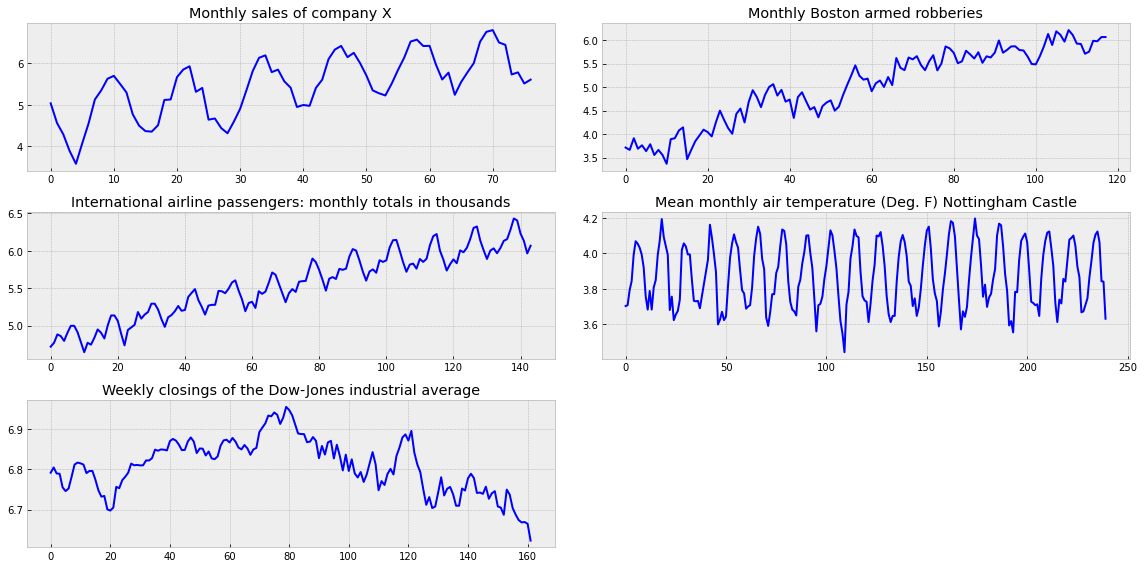

In [180]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(all_series[key]).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Стационарным оказался только график Mean monthly air temperature (Deg. F) Nottingham Castle. Уберем его из дальнейшего рассмотрения, хотя глазами можно увидеть переодичность в данных

In [181]:
all_series_stationary['Mean monthly air temperature (Deg. F) Nottingham Castle'] = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']

del all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']

# Дифференцирование (убирание тренда)

Уберем наличие тренда дифференцированием на графиках.

In [182]:
for cnt, (k, v) in enumerate(all_series.items()):
    print(f'---- Time Series №{cnt+1}----')
    all_series[k] = np.diff(all_series[k], 1)
    if test_stationarity(all_series[k]) < 0.01:
        print(f'Ряд \'{k}\' стационарный')
    else:
        print(f'Ряд \'{k}\' нестационарный')

---- Time Series №1----
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд 'Monthly sales of company X' нестационарный
---- Time Series №2----
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Ряд 'Monthly Boston armed robberies' стационарный
---- Time Series №3----
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                  

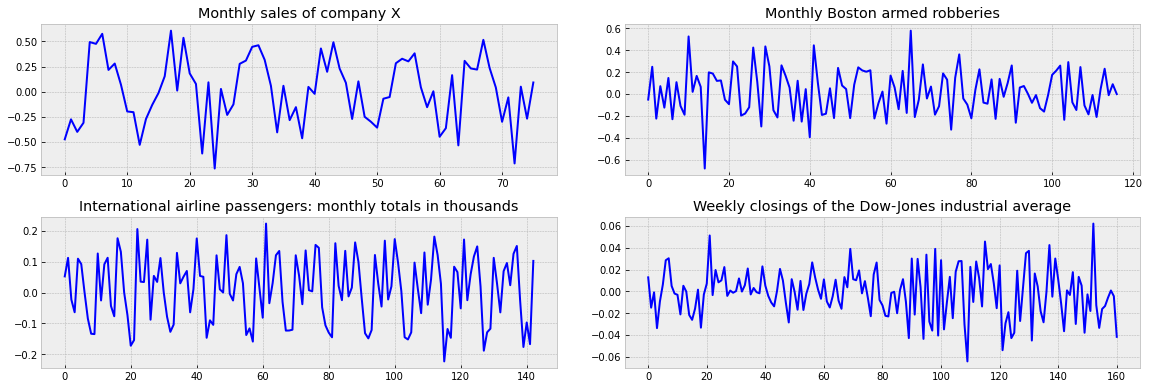

In [183]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(all_series[key]).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Стационарными оказались графики 'Monthly sales of company X', 'Monthly Boston armed robberies' и 'Weekly closings of the Dow-Jones industrial average'.

In [184]:
all_series_stationary['Monthly sales of company X'] = all_series['Monthly sales of company X']
all_series_stationary['Monthly Boston armed robberies'] = all_series['Monthly Boston armed robberies']
all_series_stationary['Weekly closings of the Dow-Jones industrial average'] = all_series['Weekly closings of the Dow-Jones industrial average']

del all_series['Monthly sales of company X']
del all_series['Monthly Boston armed robberies']
del all_series['Weekly closings of the Dow-Jones industrial average']

# Сезонность

Уберем влияние сезонности

In [185]:
for cnt, (k, v) in enumerate(all_series.items()):
    print(f'---- Time Series №{cnt+1}----')
    all_series[k] = all_series[k][12:] - all_series[k][:-12]
    if test_stationarity(all_series[k]) < 0.01:
        print(f'Ряд \'{k}\' стационарный')
    else:
        print(f'Ряд \'{k}\' нестационарный')

---- Time Series №1----
Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Ряд 'International airline passengers: monthly totals in thousands' стационарный


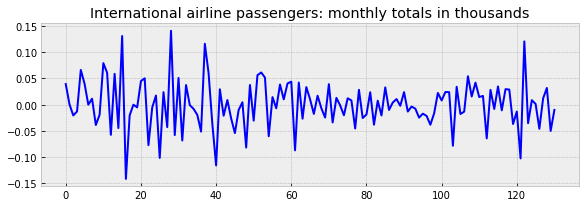

In [186]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(all_series[key]).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ряды после преобразования

In [187]:
all_series_stationary['International airline passengers: monthly totals in thousands'] = all_series['International airline passengers: monthly totals in thousands']

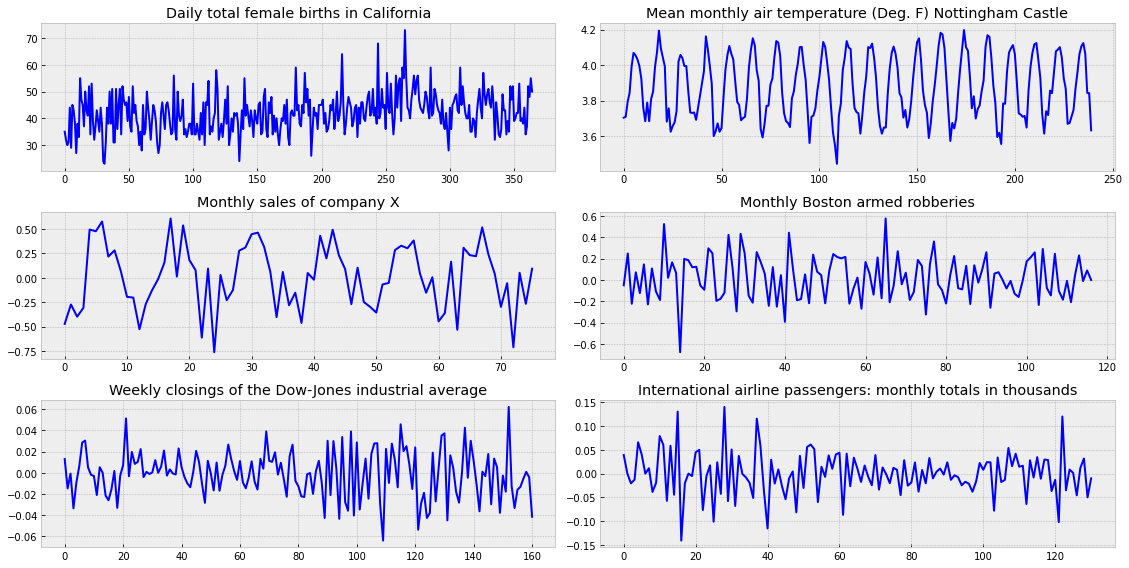

In [188]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series_stationary.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(all_series_stationary[key]).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()